# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

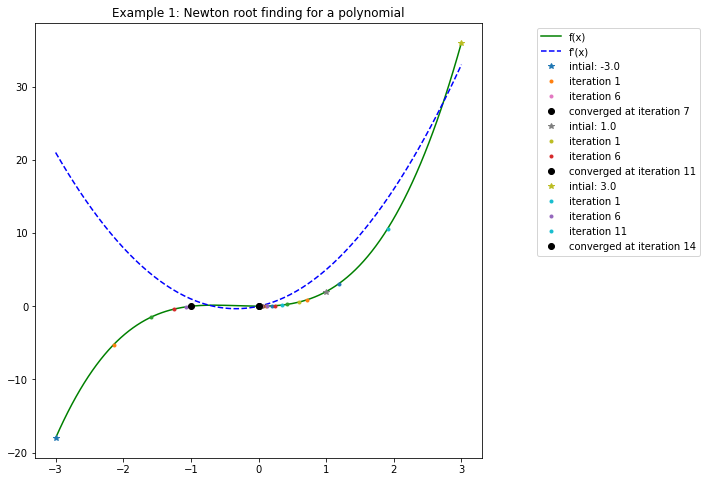

In [2]:
# Example 1: Root finding for cubic polynomial 

n = 200

x = np.linspace(-3, 3, n)  

def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

# Create the polynomial f(x) = x^3 + x^2 

p = np.poly1d([1, 1, 0, 0])

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])

p_d = np.polyder(p)

# Get values for f(x) and f'(x) for graphing purposes

y = fx(x, p)
y_d = fx(x,p_d)

# Try three possible guesses for x0

x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()


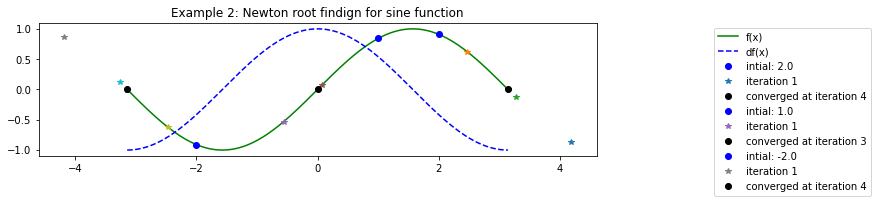

Roots: 3.141593, 0.000000, -3.141593


In [3]:
# Example 2: Root finding for sine function

n = 200

x = np.linspace(-np.pi, np.pi, n)  

def fx(x):  
    f_x = np.sin(x)        
    return f_x

def fx_d(x):    
    return np.cos(x)

# Get f(x) and f'(x) for plotting

y = fx(x)
y_d = fx_d(x)

# Consider three possible starting points

x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx(x0) / fx_d(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

In [4]:

# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))


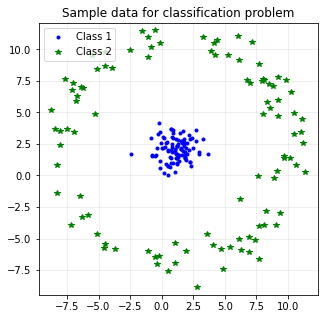

In [5]:
# Plot the data
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

In [6]:
# Split data into training and test datasets

idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [7]:
# Normalization of data
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm

XX = normalization(X)
X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

In [8]:
# define class for logistic regression: batch gradient descent
class Logistic_BGD:
      
    def __init__(self):
        pass 

    def sigmoid(self, X, theta):
        return X@theta

    def h(self, X, theta):
        # sigmoid function 
        z = self.sigmoid(X, theta)
        return 1 / (1 + np.exp(-1*z))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return 1/m * np.dot(X.T,(y_pred - y))
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X, theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = -1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost, grad
    
    def gradientDescent(self, X, y, theta, alpha, num_iters):
#         X = np.insert(X, 0, 1, axis=1)  
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(X.shape[0]):
            y1=self.h(X[i], theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        return (float(correct)/len(predicted))*100

## In lab exercises

1. Verify that the gradient descent solution given above is correct. Plot the optimal decision boundary
   you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


In [9]:
# define class for logistic regression: batch gradient descent
class Logistic_Newton:
      
    def __init__(self):
        pass 

    def sigmoid(self, X, theta):
        return X@theta

    def h(self, X, theta):
        # sigmoid function 
        z = self.sigmoid(X, theta)
        return 1 / (1 + np.exp(-1*z))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return 1/m * np.dot(X.T,(y_pred - y))
    
    def hessian(self, xi, theta):
        y_pred = self.h(xi,theta) # sigmoid output (prediction) 
        xi = xi.reshape(-1,1) # convert from 1d array to 2d (matrix) 
        return xi@xi.T * (y_pred) * (1-y_pred)
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X, theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = -1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost, grad
    
    def newtonMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        
        # see error
        found_sigular_matrix = False 
        error_msg = None 
        for i in range(num_iters):
            hessian_mat = np.zeros((X.shape[1], X.shape[1]))
            
            # compute hessian matrix of x_i
            for i in range(X.shape[0]):
                hmat_xi = self.hessian(X[i], theta)
                
                # sum of all matrixs (by element position)
                hessian_mat += hmat_xi
            cost, grad = self.costFunc(theta, X,y)
            
            # replace gradient descent with newton method
            # follow the formular above. 
            try : 
                theta = theta - np.linalg.inv(hessian_mat) @ grad
            except Exception as e : 
                error_msg = e
                found_sigular_matrix = True
                # leverages SVD to approximate initial matrix.
                theta = theta - np.linalg.pinv(hessian_mat) @ grad
            J_history.append(cost)
            theta_history.append(theta)
        if found_sigular_matrix :
            print('Found error while compute newton method error ! ')
            print(error_msg)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(X.shape[0]):
            y1=self.h(X[i], theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        return (float(correct)/len(predicted))*100
X.shape

(200, 2)

In [10]:
def boundary_points(X, theta):
    theta = theta.reshape(-1,1)
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [11]:
# create X to equal to polynomail function
x_df = pd.DataFrame(X, columns=['X0', 'X1'])

x_df['y'] = y 

x_df['X0'] = normalization(x_df.X0)
x_df['X1'] = normalization(x_df.X1)
linX = x_df[['X0','X1']].values
linX = np.insert(linX, 0, 1, axis=1)

X_train = linX[idx_train]
X_test = linX[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [12]:
alpha = 0.5
iterations = 1000
theta_initial = np.ones(X_train.shape[1])

lg = Logistic_BGD()
theta_x, j_hist_x = lg.gradientDescent(X_train, y_train, theta_initial, alpha, iterations)


In [13]:
iterations = 1000
ln = Logistic_Newton()
theta_xn, j_hist_xn = ln.newtonMethod(X_train, y_train, theta_initial, iterations)

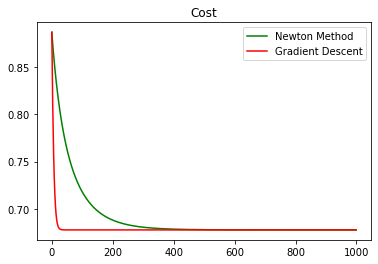

Minimum Cost for each method
Gradient : 0.6779636520394073
Newton : 0.6779640832047467


In [14]:
plt.title('Cost')
plt.plot(j_hist_xn, label='Newton Method',color='g')
plt.plot(j_hist_x, label='Gradient Descent',color='r')

plt.legend()
plt.show()

print('Minimum Cost for each method')
print('Gradient :', np.min(j_hist_x))
print('Newton :', np.min(j_hist_xn))

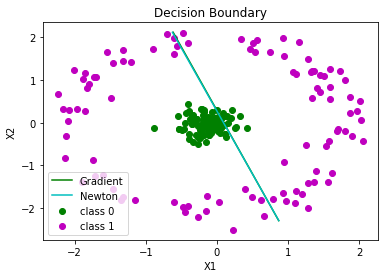

In [15]:
y0_df = x_df[x_df.y == 0]
y1_df = x_df[x_df.y == 1]


point_1, point_2 = boundary_points(linX[:,1:], theta_x)
point_1n, point_2n = boundary_points(linX[:,1:], theta_xn)

plt.title('Decision Boundary')
plt.scatter(y0_df.X0, y0_df.X1, c='g', label='class 0')
plt.scatter(y1_df.X0, y1_df.X1, c='m', label='class 1')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
# plot the boundaries for both methods
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-', label='Gradient')
plt.plot([point_1n[0,0], point_2n[0,0]],[point_1n[1,0], point_2n[1,0]], 'c-', label='Newton')
plt.legend(loc=0)
plt.show()

In [16]:
yg_pred = lg.predict(X_test, theta_x)
yn_pred = ln.predict(X_test, theta_xn)
g_acc = lg.checkAccuracy(yg_pred, y_test)
n_acc = ln.checkAccuracy(yn_pred, y_test)

print("Test Accuracy")
print('Gradient Descent Accuracy : ', g_acc)
print('Newton Method Accuracy : ', n_acc)

Test Accuracy
Gradient Descent Accuracy :  75.0
Newton Method Accuracy :  75.0


## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset.

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03.
   
## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.


In [17]:
# Verify that the gradient descent solution and plot the optimal decision boundary
# Prepare the data
# Convert X to angle and radius

df = pd.DataFrame(X, columns=['X0','X1'])
df['angles'] = np.arctan(df.X1 / df.X0)
df['radius'] = np.sqrt(df.X0 ** 2 + df.X1 ** 2)
df['y'] = y
newX = df[['angles', 'radius']].values
newX = np.insert(newX, 0, 1, axis=1)
X_train = newX[idx_train]
X_test = newX[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [18]:
df.head()

,X0,X1,angles,radius,y
0,-0.151276,-0.440950,1.240311,0.466177,0.0
1,-0.113849,0.017033,-0.148506,0.115116,0.0
2,0.028860,-0.112564,-1.319813,0.116205,0.0
3,0.089049,0.218827,1.184324,0.236252,0.0
4,0.253997,-0.121357,-0.445720,0.281500,0.0


In [19]:
df.tail()

,X0,X1,angles,radius,y
195,-0.266541,-2.210680,1.450806,2.226690,1.0
196,0.944442,-0.927756,-0.776486,1.323897,1.0
197,1.356631,1.209154,0.727983,1.817279,1.0
198,-0.705334,2.090043,-1.245324,2.205850,1.0
199,-1.542865,1.645995,-0.817728,2.256043,1.0


Text(0, 0.5, 'radius')

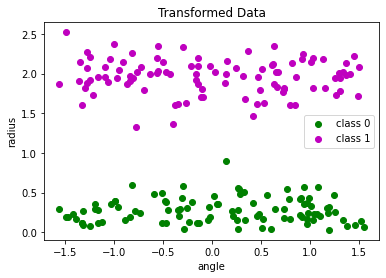

In [20]:
y0_df = df[df.y == 0]
y1_df = df[df.y == 1]
plt.title('Transformed Data')
plt.scatter(y0_df.angles, y0_df.radius, c='g', label='class 0')
plt.scatter(y1_df.angles, y1_df.radius, c='m', label='class 1')
plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')


In [21]:
alpha = 0.01
iterations = 10000
theta_initial = np.ones(newX.shape[1])
lg = Logistic_BGD()
theta, j_hist = lg.gradientDescent(X_train, y_train, theta_initial, alpha, iterations)

In [22]:
iterations = 500
theta_initial = np.ones(newX.shape[1])

ln = Logistic_Newton()
theta_n, j_hist_n = ln.newtonMethod(X_train, y_train, theta_initial, iterations)

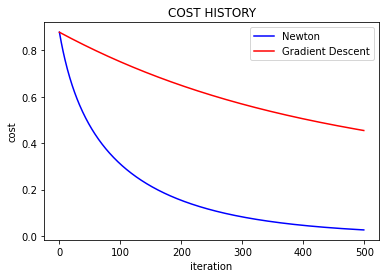

Minimum Cost for each method form polar transformation
Gradient : 0.04725619848640162
Newton : 0.02629331814211235


In [23]:
plt.plot(j_hist_n, label='Newton',color='b')
plt.plot(j_hist[:iterations], label='Gradient Descent',color='r')
plt.title("COST HISTORY")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.show()
print('Minimum Cost for each method form polar transformation')
print('Gradient :', np.min(j_hist))
print('Newton :', np.min(j_hist_n))

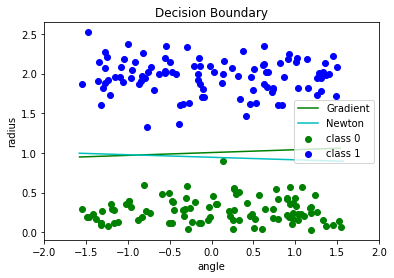

In [24]:
y0_df = df[df.y == 0]
y1_df = df[df.y == 1]


point_1, point_2 = boundary_points(newX[:,1:], theta)
point_1n, point_2n = boundary_points(newX[:,1:], theta_n)

plt.title('Decision Boundary')
plt.scatter(y0_df.angles, y0_df.radius, c='g', label='class 0')
plt.scatter(y1_df.angles, y1_df.radius, c='b', label='class 1')
plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')
# plot the boundaries for both methods
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-', label='Gradient')
plt.plot([point_1n[0,0], point_2n[0,0]],[point_1n[1,0], point_2n[1,0]], 'c-', label='Newton')
plt.legend(loc=0)
# plt.ylim(0,14)
plt.xlim(-2,2)
plt.show()

In [25]:
yg_pred = lg.predict(X_train, theta)
yn_pred = ln.predict(X_train, theta_n)
g_acc = lg.checkAccuracy(yg_pred, y_train)
n_acc = lg.checkAccuracy(yn_pred, y_train)

print("Train accuracy of polar transformation")
print('Accuracy  of Gradient descent: ', g_acc)
print('Accuracy of Newton method: ', n_acc)

yg_pred = lg.predict(X_test, theta)
yn_pred = ln.predict(X_test, theta_n)
g_acc = lg.checkAccuracy(yg_pred, y_test)
n_acc = lg.checkAccuracy(yn_pred, y_test)

print("Test accuracy of polar transformation")
print('Accuracy  of Gradient descent: ', g_acc)
print('Accuracy of Newton method: ', n_acc)

Train accuracy of polar transformation
Accuracy  of Gradient descent:  100.0
Accuracy of Newton method:  100.0
Test accuracy of polar transformation
Accuracy  of Gradient descent:  100.0
Accuracy of Newton method:  100.0


### Let's Newton method in Lab 3- Loan prediction dataset

In [26]:
# Import the data

import pandas as pd

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)

Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [27]:
#Now checking for the missing values of the train and test datasets

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [28]:
# Filling the missing values

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
fill_martial_status(data_test, 2, 1)

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

data_train['Dependents'].replace('3+', '4', inplace = True)
data_test['Dependents'].replace('3+', '4', inplace = True)

loan_amount_mean = np.mean(data_train["LoanAmount"])
data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

# filling Gender by mode
data_train.Gender.fillna(data_train.Gender.mode()[0], inplace=True)
data_test.Gender.fillna(data_test.Gender.mode()[0], inplace=True)
# filling Self Employed by mode
data_train.Self_Employed.fillna(data_train.Self_Employed.mode()[0] , inplace=True)
data_test.Self_Employed.fillna(data_test.Self_Employed.mode()[0] , inplace=True)
# filling loan amount term by mean 
data_train.Loan_Amount_Term.fillna(data_train.Loan_Amount_Term.mean() , inplace=True)
data_test.Loan_Amount_Term.fillna(data_test.Loan_Amount_Term.mean() , inplace=True)

# filling credit history by mode
data_train.Credit_History.fillna(data_train.Credit_History.mode()[0]  , inplace=True)
data_test.Credit_History.fillna(data_test.Credit_History.mode()[0]  , inplace=True)


In [29]:
#Now checking for the missing values of the train and test datasets

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [30]:
data_test = data_test.iloc[0:,1:]
data_train = data_train.iloc[0:,1:]

print(data_test.info())
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0

In [31]:
#Converting categorical into 0 and 1

data_train['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)
data_train['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Rural', 2, inplace = True)
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)


data_test['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Rural', 2, inplace = True)

print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
--

In [32]:
print(data_train.dtypes)
data_train['Dependents'] = data_train['Dependents'].astype(str).astype(int)
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].astype(int)
data_train['Credit_History'] = data_train['Credit_History'].astype(int)
data_train['CoapplicantIncome'] = data_train['CoapplicantIncome'].astype(int)
data_train['LoanAmount'] = data_train['LoanAmount'].astype(int)
print(data_train.dtypes)

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
dtype: object


In [33]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0,146,360,1,0,1
1,0,1,1,1,0,4583,1508,128,360,1,2,0
2,0,1,0,1,1,3000,0,66,360,1,0,1
3,0,1,0,0,0,2583,2358,120,360,1,0,1
4,0,0,0,1,0,6000,0,141,360,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0,71,360,1,2,1
610,0,1,4,1,0,4106,0,40,180,1,2,1
611,0,1,1,1,0,8072,240,253,360,1,0,1
612,0,1,2,1,0,7583,0,187,360,1,0,1


In [34]:
# apply newton method with Lab 3 dataset 
iterations = 1000
theta_initial = np.ones(X_train.shape[1])

ln_lab = Logistic_Newton()
theta_nlab, j_hist_nlab = ln_lab.newtonMethod(X_train, y_train, theta_initial, iterations)

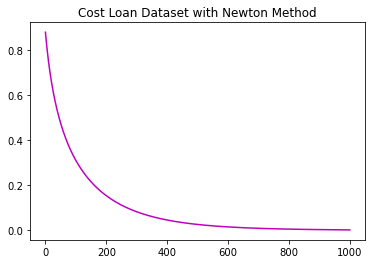

Train Set Accuracy of Lab3 dataset
Newton Method Accuracy :  100.0
Test Set Accuracy of Lab3 dataset
Newton Method Accuracy :  100.0


In [35]:
plt.title('Cost Loan Dataset with Newton Method')
plt.plot(j_hist_nlab, color='m')
plt.show()

yn_pred = ln_lab.predict(X_train, theta_nlab)
n_acc = ln_lab.checkAccuracy(yn_pred, y_train)
print("Train Set Accuracy of Lab3 dataset")
print('Newton Method Accuracy : ', n_acc)

yn_pred = ln_lab.predict(X_test, theta_nlab)
n_acc = ln_lab.checkAccuracy(yn_pred, y_test)

print("Test Set Accuracy of Lab3 dataset")
print('Newton Method Accuracy : ', n_acc)